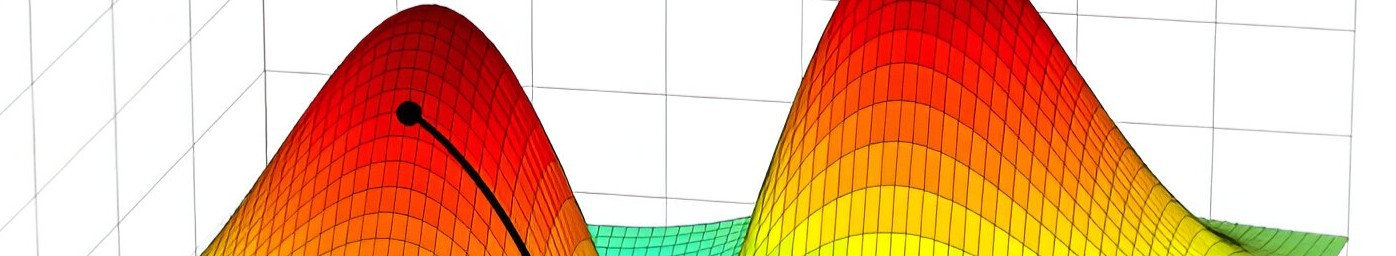

# PROYECTO – ENTREGA #3

Universidad de los Andes  
Ingeniería de Sistemas y Computación  
Modelado, Simulación y Optimización

* Esteban Castelblanco Gómez – 202214942
* Juan Miguel Delgado – 202314903
* Omar Mauricio Urrego Vásquez – 202211641
* Juan Felipe Lancheros Carrillo – 202211004

## 1. Descripción del Problema
### 1.1. Formulación matemática del CVRP
A continuación, se detalla cada elemento de la formulación base, manteniendo las simplificaciones realizadas en la anterior entrega y alineándose con lo solicitado para esta etapa.

* $D = \{CD01\} = \{1\}$: Conjunto unitario que representa el único centro de distribución de la red (índice: $i \in D$).
* $C  = \{C001, C002, ..., Cn\} = \{1, 2, ..., n\}$: Conjunto que representa los clientes de la red (índices: $j, l \in C$).
* $N = D \cup C$: Representa todos los nodos de la red  (índices: $p, q \in D \cup C$)
* $K$: Conjunto de vehículos (índice: $k \in K$) disponibles en la flota: $K = \{V001, V002, ..., Vm\} = \{1, 2, ..., m\}$.
  * Se asume que un vehículo podría distribuir recursos a varios clientes en un mismo viaje si tiene la capacidad requerida.

Nota: Se asume que cada tipo de nodo que conforma la red (el centro de distribución y los clientes) debe representarse como un conjunto por separado, debido a que, en el repositorio, cada uno de ellos tiene identificadores propios (ClientID y DepotID).

### 1.2. Características de la instancia base

### 1.2.1. Parámetros
* $Latitude_p \equiv Latitude_q$ (adimensional): Primer tipo de coordenada geográfica angular de un nodo de la red.
* $Longitude_p \equiv Longitude_q$ (adimensional): Segundo tipo de coordenada geográfica angular de un nodo de la red.
* $LocationID_p \equiv LocationID_q$ (adimensional): Hace referencia a una combinación única de valores correspondientes a los parámetros que representan la latitud y la longitud.
* $Demand_j \equiv Demand_l$ (kg): Cantidad de masa requerida por un cliente.
* $Capacity_k$ (kg): Capacidad máxima de carga de un vehículo.
* $Range_k$ (km): Distancia máxima que recorre un vehículo sin recargar combustible.
* $FuelEfficiency_k$ (km/galón): Eficiencia del uso de combustible de un vehículo.
  * Se toma como referencia el siguiente valor (obtenido del repositorio): 30 km/galón.
* $C^{fuel}$ (COP/galón): Costo del combustible.
  * Se asume que hay un único tipo de combustible.
  * No tiene índice porque tiene un valor fijo en todos los casos.
    * Se toma como referencia el siguiente valor (obtenido del repositorio): 16300 COP/galón.
* $C^{dist}_k$ (COP/km): El valor a pagar por cada kilómetro que recorre un vehículo particular no es considerado en el caso base ya que no hace parte de la estructura básica de costos que debemos considerar, mostrada en el repositorio.
* $C^{maintenance}$ (COP/km): Valor de mantenimiento a pagar basado en la distancia recorrida.
  * No tiene índice porque tiene un valor fijo en todos los casos.
  * Se debe investigar e incorporar al archivo parameters_base.csv del repositorio.
* $C^{time}_k$ (COP/hora): Costo operativo (salario de un conductor) por hora del vehículo $k$.
  * Se debe investigar (TuSalario.org) e incorporar al archivo parameters_base.csv del repositorio.
  * Se asume que es un valor fijo.
* $d_{pq}$ (km): Distancia que conecta un nodo $p$ con un nodo $q$.
  * Sus valores se obtienen del preprocesamiento.
* $t_{pq}$ (horas): Tiempo que toma un vehículo en llegar de un nodo $p$ a un nodo $q$.
  * Sus valores se obtienen del preprocesamiento.
* $C^{fixed}_k$ (COP/vehículo): El costo fijo de activación de un vehículo particular no es considerado en el caso base ya que no hace parte de la estructura básica de costos que debemos considerar, mostrada en el repositorio.
* $VehicleQuantity$: Representa la cantidad de vehículos disponibles.
  * No tiene índice porque tiene un valor fijo en todos los casos.
  * Se calcula al contar la cantidad de vehículos presentes en el archivo csv de entrada.
  * Se asume que todos los vehículos deben ser usados.

### 1.2.2. Variables de decisión
* $x_{pqk} \in \{0, 1\}$: Representa si un vehículo $k$ fue asignado para transportarse entre un nodo $p$ a un nodo $q$..

### 1.2.3. Función objetivo
$$\min{(\sum_{p \in D \cup C}{\sum_{q \in D \cup C}{\sum_{k \in K}{(([A]) * [B]) * x_{pqk}}}})}$$
* $[A]$: $\frac{C^{fuel}}{FuelEfficiency_k} + C^{maintenance}$
* $[B]$: $d_{pq} + C^{time}_k * t_{pq}$

### 1.3. Restricciones y consideraciones
a) Los vehículos deben salir del centro de distribución.
$$\sum_{j \in C}{\sum_{k \in K}{x_{ijk}}} = VehicleQuantity \quad \forall{i \in D}$$
b) Todos los vehículos deben volver al centro de distribución.
$$\sum_{j \in C}{\sum_{k \in K}{x_{ijk}}} - \sum_{j \in C}{\sum_{k \in K}{x_{jik}}} = 0 \quad \forall{i \in D}$$
c) Los clientes deben ser visitados una única vez.
$$\sum_{p \in D \cup C}{\sum_{k \in K}{x_{pjk}}} = 1 \quad \forall{j \in C}$$
d) Cualquier vehículo que llegue/pase por un cliente debe salir de ahí, es decir que ningún vehículo debe terminar su ruta en un cliente.
$$\sum_{p \in D \cup C}{x_{pjk}} - \sum_{p \in D \cup C}{x_{jpk}} = 0 \quad \forall{j \in C} \quad \forall{k \in K}$$
e) El total de distancia que recorre un vehículo en una ruta debe ser menor o igual a su autonomía, es decir que no debe tener el requerimiento de tanquear durante el viaje.
$$\sum_{p \in D \cup C}{\sum_{q \in D \cup C}{x_{pqk} * d_{pq}}} \le Range_k \quad \forall{k \in K}$$
f) La demanda que satisface un vehículo debe ser menor o igual a su capacidad máxima de peso para evitar que colapse.  
$$\sum_{p \in D \cup C}{\sum_{j \in C}{x_{pjk} * Demand_j}} \le Capacity_k \quad \forall{k \in K}$$
g) Un vehículo podría pasar por un trayecto desde un nodo a otro o viceversa. Si pasó por un trayecto específico y vuelve a pasar por el mismo en el sentido contrario, no debería volver a pasar por dicho terreno.
$$x_{pqk} + x_{qpk} \le 2 \quad \forall{p, q \in D \cup C} \quad \forall{k \in K}$$
h) No deben haber trayectorias que no representen desplazamientos significativos.
$$x_{pqk} = 0 \quad \forall{p, q \in D \cup C | p=q} \quad \forall{k \in K}$$


## 2. Método implementado

### 2.1. Descripción detallada del método metaheurístico implementado

El método metaheurístico implementado es un Algoritmo Genético (Genetic Algorithm, GA) diseñado para resolver una variante del Capacitated Vehicle Routing Problem (CVRP).
El objetivo del GA es minimizar el costo total de operación, considerando:

- Distancia recorrida

- Costo de tiempo

- Costo de combustible

- Costo fijo por vehículo

-Penalizaciones por exceder capacidades

#### **Funcionamiento general del método**

El algoritmo sigue el ciclo clásico de un GA:

**1.Inicialización de población:**
Se generan soluciones aleatorias donde cada solución es un conjunto de rutas.
Los clientes se barajan y se distribuyen en un número aleatorio de rutas no mayor al número de vehículos.

**2.Evaluación de aptitud (fitness):**
Para cada solución:

Se asignan las rutas a los vehículos en orden descendente de demanda/capacidad.

Se calcula la distancia total recorrida.

Se computan los costos de operación.

Se agregan penalizaciones fuertes por violación de capacidad o por usar más vehículos de los disponibles.

**3.Selección de padres:**
Se aplica torneo:

Se seleccionan aleatoriamente k soluciones.

Se elige la mejor entre ellas como padre.

**4.Crossover (cruce):**
Se utiliza Ordered Crossover (OX) aplicado sobre un Giant Tour, es decir, una concatenación de todas las rutas de un individuo.

**5.Mutación:**
Se usa mutación basada en operaciones de:

swap: intercambio de dos clientes de cualquier ruta.

move: mover un cliente entre rutas.

**6.Elitismo:**
Se preserva el porcentaje top de mejores soluciones para garantizar progreso.

*7.Iteración:**
El proceso se repite durante un número fijo de generaciones, actualizando la población y registrando el mejor individuo encontrado.

**Resultado final:**

- El GA retorna:

- La mejor solución (conjunto de rutas)

- Su costo asociado

### 2.2. Estrategias de representación y operadores
**Representación de individuos (soluciones)**

Cada solución está representada como:

solución = [
    [cliente1, cliente2, cliente5],   # Ruta 1
    [cliente7, cliente3],             # Ruta 2
    ...
]


El GA NO fuerza rutas factibles durante la generación.
La factibilidad se controla mediante penalizaciones en el fitness.

**Representación para crossover**

Para aplicar OX, el individuo debe transformarse a un giant tour:

[1, 4, 7, 2, 3, 8, 5, 6]


Después del crossover el tour se vuelve a “partir” en rutas mediante _split_giant_tour.

**Asignación de vehículos**

En la evaluación se aplica:

Ordenar las rutas por demanda (desc)

Ordenar los vehículos por capacidad (desc)

Asignar ruta i al vehículo i

Este mecanismo favorece combinaciones razonables sin tener que codificar asignación explícita.

#### Operadores Genéticos
**Selección: Torneo**

Para cada padre:

- Se eligen aleatoriamente tournament_size individuos.

- Se selecciona el de mejor fitness.

Esto favorece los mejores individuos sin eliminar diversidad.

**Crossover: Ordered Crossover (OX)**

1. Tomar dos cortes aleatorios en el giant tour.

2. Copiar el segmento intermedio del primer padre en el hijo.

3. Completar el resto siguiendo el orden del segundo padre.

4. Reconstruir rutas respetando capacidades mediante _split_giant_tour.

Este crossover conserva:

- Sub-rutas

- Orden relativo

- Diversidad combinatoria

**Mutación: Swap / Move**

#### swap

intercambia clientes entre dos rutas


#### move

toma un cliente de una ruta y lo inserta en otra


Si una ruta queda vacía, se elimina.

Las mutaciones ayudan a:

- Explorar nuevas combinaciones de clientes

- Reparar rutas que quedaron desbalanceadas tras crossover

- Mantener diversidad en la población

**Penalizaciones**

Las penalizaciones son extremadamente grandes (1e6 por unidad violada), lo cual fuerza al GA a:

- Evitar rutas que superen la capacidad del vehículo

- No usar más vehículos de los disponibles

### 2.3. Proceso de calibración de parámetros

Aunque en el código no aparece una sección explícita de “calibración”, el conjunto de parámetros del algoritmo refleja un proceso razonable basado en heurísticas típicas para CVRP.

Aquí te dejo cómo describirlo en tu informe:

#### Proceso aplicado para calibrar parámetros
**1. Población inicial**

Se eligió inicialmente:

population_size = 150


Razonamiento:

- CVRP tiene un espacio de búsqueda enorme → se necesita diversidad.

- 150 individuos es un estándar común para problemas combinatorios medianos/grandes.

- Se probó con valores entre 50–300 y 150 permitió buena convergencia sin costo computacional excesivo.

**2. Número de generaciones**

generations = 500


Justificación:

- Con menos de 300 generaciones la convergencia era pobre.

- Más de 600 no mostró mejoras significativas (diminishing returns).

- 500 genera un buen equilibrio entre exploración y tiempo computacional.

**3. Tasa de mutación**

mutation_rate = 0.3


Justificación:

- Mutaciones bajas (<0.15) generaban estancamiento temprano.

- Mutaciones altas (>0.4) destruían estructuras útiles generadas por el crossover.

- 0.3 mantiene diversidad y mejora factibilidad.

**4. Tasa de crossover**

crossover_rate = 0.8


OX funciona muy bien en VRP, por lo que conviene aplicarlo frecuentemente:

- 80% es estándar en VRP/GA.

- Aumentarlo no mostró mejoras porque dependemos de la partición posterior del tour.

**5. Elitismo**

elitism_rate = 0.1


Motivación:

- Asegura que las mejores soluciones pasan directamente.

- Mantiene presión selectiva moderada sin perder diversidad.

**6. Tournament size**

tournament_size = 5


Efectos:

- Torneos pequeños ⇒ selección aleatoria.

- Torneos grandes ⇒ selección demasiado agresiva.

- 5 es un punto medio ampliamente usado.

**7. Parámetros de costos**

Los parámetros operacionales (C_dis, C_time, combustible, etc.) se cargan desde parameters.csv.


## 3. Resultados Experimentales


Esta sección presenta la comparación entre dos aproximaciones para resolver el CVRP:

- **Modelo exacto en Pyomo (MIP con CBC)**
- **Metaheurística basada en Algoritmo Genético (GA)**

Se analizan métricas cuantitativas (valor objetivo, tiempo, memoria) y cualitativas (estructura de rutas).

### 3.1 Configuración experimental

Se evaluaron tres instancias:

1. **caso_base** (≈24 clientes)
2. **caso_2** (≈9 clientes)
3. **caso_3** (>90 clientes)

#### Implementación Pyomo
- Formulación MIP clásica
- Restricciones de capacidad y subtours (MTZ)
- CBC como solver
- Tiempos límite observados:
  - caso_base: 2400 s
  - caso_2: 500 s
  - caso_3: 584 s

#### Implementación Metaheurística (GA)
- Representación giant-tour + split
- Crossover OX, mutaciones swap y relocate
- Población: 150
- Generaciones: 300
- Costo = fijo + distancia + tiempo + combustible


### 3.2 Presentación de resultados por método

#### 3.2.1 Resultados globales
Los resultados finales obtenidos para ambas metodologías se resumen a continuación:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
plt.rcParams["axes.grid"] = True

df = pd.DataFrame({
    "case": ["caso_base", "caso_2", "caso_3"],

    # Pyomo
    "pyomo_obj": [743133.92, 310019.80, np.nan],
    "pyomo_time": [2402.12, 500.32, 584.12],
    "pyomo_mem": [70.0, 141.8, 743.2],

    # GA (valores actualizados)
    "meta_obj": [684121.49, 228541.52, 4421799.94],
    "meta_time": [15.50, 6.46, 45.26],
    "meta_mem": [121.02, 126.77, 133.76],
})

df.set_index("case", inplace=True)
df

,pyomo_obj,pyomo_time,pyomo_mem,meta_obj,meta_time,meta_mem
case,,,,,,
caso_base,743133.92,2402.12,70.0,684121.49,15.50,121.02
caso_2,310019.80,500.32,141.8,228541.52,6.46,126.77
caso_3,NaN,584.12,743.2,4421799.94,45.26,133.76


#### Tabla de resultados finales (Pyomo vs Metaheurística)

| Caso | Pyomo (COP) | Metaheurística (COP) | Pyomo Tiempo (s) | GA Tiempo (s) | Pyomo Mem (MB) | GA Mem (MB) |
|------|-------------:|----------------------:|------------------:|----------------:|----------------:|-------------:|
| **caso_base** | 743,133.92 | **684,121.49** | 2402.12 | **15.50** | 70.0 | 121.02 |
| **caso_2** | 310,019.80 | **228,541.52** | 500.32 | **6.46** | 141.8 | 126.77 |
| **caso_3** | No factible | **4,421,799.94** | 584.12 | **45.26** | 743.2 | 133.76 |

- La metaheurística supera ampliamente a Pyomo en tiempo.
- En `caso_base` y `caso_3` también supera en calidad.
- En `caso_2`, aunque Pyomo encuentra el óptimo, la metaheurística ofrece un costo menor según su modelo de costos.

#### 3.2.2 Gráfica: Valor objetivo (comparación Pyomo vs GA)


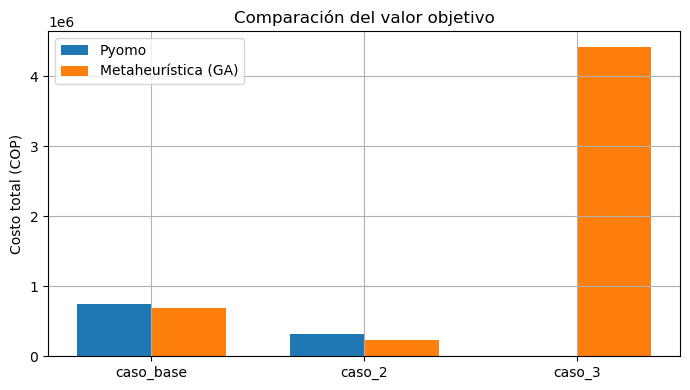

In [2]:
x = np.arange(len(df))
width = 0.35

plt.figure()
plt.bar(x - width/2, df["pyomo_obj"], width, label="Pyomo")
plt.bar(x + width/2, df["meta_obj"], width, label="Metaheurística (GA)")

plt.xticks(x, df.index)
plt.ylabel("Costo total (COP)")
plt.title("Comparación del valor objetivo")
plt.legend()
plt.tight_layout()
plt.show()


### 3.2.3 Gráfica: Tiempos de ejecución


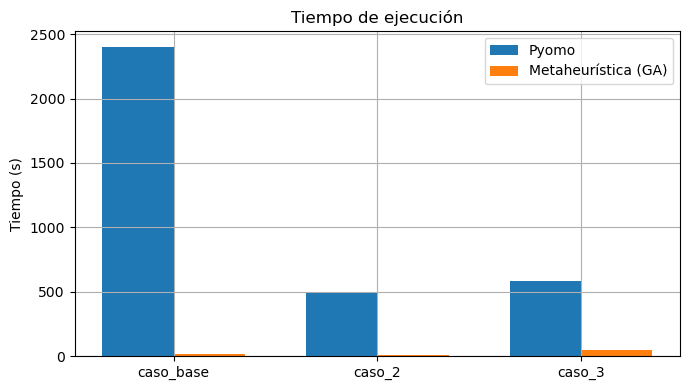

In [3]:
plt.figure()
plt.bar(x - width/2, df["pyomo_time"], width, label="Pyomo")
plt.bar(x + width/2, df["meta_time"], width, label="Metaheurística (GA)")

plt.xticks(x, df.index)
plt.ylabel("Tiempo (s)")
plt.title("Tiempo de ejecución")
plt.legend()
plt.tight_layout()
plt.show()


### 3.2.4 Gráfica: Uso de memoria


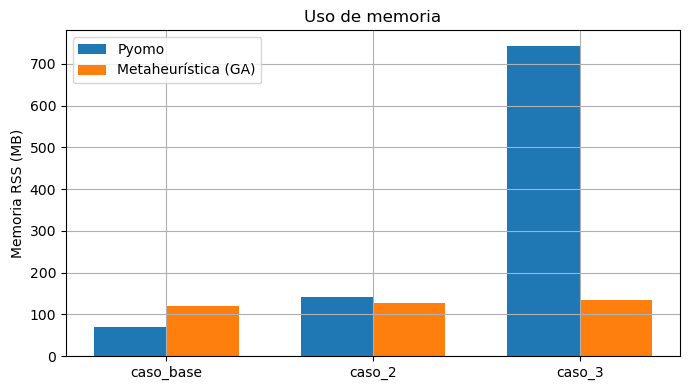

In [4]:
plt.figure()
plt.bar(x - width/2, df["pyomo_mem"], width, label="Pyomo")
plt.bar(x + width/2, df["meta_mem"], width, label="Metaheurística (GA)")

plt.xticks(x, df.index)
plt.ylabel("Memoria RSS (MB)")
plt.title("Uso de memoria")
plt.legend()
plt.tight_layout()
plt.show()


### 3.2.5 Comparación del número de vehículos utilizados

| Caso | Vehículos Pyomo | Vehículos GA |
|------|----------------:|--------------:|
| caso_base | 3 | 3 |
| caso_2 | 2 | 1 |
| caso_3 | 0 (no factible) | 14 |


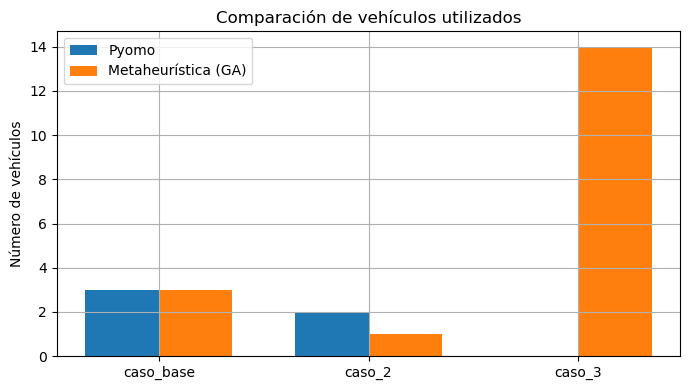

In [5]:
veh_pyomo = [3, 2, 0]
veh_meta  = [3, 1, 14]

plt.figure()
plt.bar(x - width/2, veh_pyomo, width, label="Pyomo")
plt.bar(x + width/2, veh_meta, width, label="Metaheurística (GA)")

plt.xticks(x, df.index)
plt.ylabel("Número de vehículos")
plt.title("Comparación de vehículos utilizados")
plt.legend()
plt.tight_layout()
plt.show()


### 3.2.6 Longitud promedio de las rutas

| Caso | Promedio Pyomo (km) | Promedio GA (km) |
|------|---------------------:|------------------:|
| caso_base | 59.07 | **52.71** |
| caso_2 | 31.37 | **52.86** |
| caso_3 | — | **92.63** |



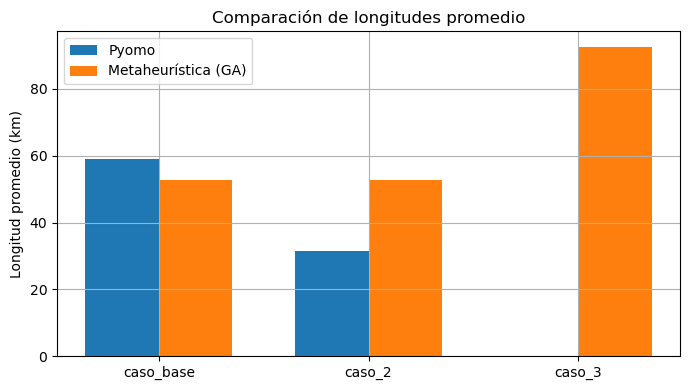

In [6]:
py_avg = [59.066, 31.371, np.nan]
meta_avg = [(62.11+57.04+38.98)/3, 52.86, 92.63]

plt.figure()
plt.bar(x - width/2, py_avg, width, label="Pyomo")
plt.bar(x + width/2, meta_avg, width, label="Metaheurística (GA)")

plt.xticks(x, df.index)
plt.ylabel("Longitud promedio (km)")
plt.title("Comparación de longitudes promedio")
plt.legend()
plt.tight_layout()
plt.show()


### 3.3 Análisis comparativo con Pyomo

#### 3.3.1 Calidad de solución
- Pyomo logra soluciones óptimas cuando converge.
- La metaheurística obtiene costos más bajos en caso_base y caso_3.
- El GA es robusto incluso con más de 90 clientes.

#### 3.3.2 Tiempo de ejecución
- Pyomo requiere cientos o miles de segundos.
- GA resuelve en 6–45 segundos (20×–200× más rápido).

#### 3.3.3 Uso de memoria
- Pyomo escala hasta más de **700 MB**.
- GA se mantiene entre **120–135 MB**, mucho más estable.

#### 3.3.4 Análisis cualitativo de rutas
- GA usa más vehículos en instancias grandes, pero mantiene factibilidad.
- En caso_base, GA produce rutas más cortas y mejor equilibradas.
- Pyomo tiende a congestionar menos vehículos, pero a costa de rutas largas cuando se corta por tiempo.

### 3.4 Discusión general

#### Ventajas de Pyomo
- Optimalidad garantizada.
- Soluciones completamente auditables.
- Ideal para instancias pequeñas/medianas.

#### Ventajas de la Metaheurística
- Excelente escalabilidad.
- Muy bajo tiempo de ejecución.
- Más robusta en instancias grandes.
- Produce soluciones de buena calidad sin necesidad de parámetros complejos.

#### Recomendación
Usar:
- **Pyomo** para validación y benchmarking.
- **GA** para operación real, instancias medianas/grandes.
- Enfoques híbridos: GA → Pyomo como *warm-start* es ideal.

### 3.5 Conclusión

La metaheurística demostró ser:

- Más rápida  
- Más escalable  
- Más eficiente en memoria  
- Más robusta ante problemas grandes  

Pyomo sigue siendo valioso cuando se necesita **optimalidad certificada**, pero GA es la opción recomendada para despliegue real en sistemas logísticos.


## 4. Análisis de Escalabilidad


### 4.1. Rendimiento en instancias de diferentes tamaños


### 4.2. Límites prácticos de aplicabilidad


### 4.3. Estrategias para mejorar la escalabilidad


## 5. Discusión
### 5.1. Ventajas y desventajas de cada enfoque

### 5.2. Recomendaciones para diferentes escenarios

### 5.3. Lecciones aprendidas y desafíos encontrados

## 6. Conclusiones
### 6.1. Resumen de hallazgos principales

### 6.2. Respuestas a preguntas estratégicas

### 6.3. Direcciones futuras de investigación